<a href="https://colab.research.google.com/github/flaviorv/ml_classification/blob/main/classification_tp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing data: False

Random Forest scores:
               precision    recall  f1-score   support

      Retail       0.86      0.86      0.86        35
      Horeca       0.93      0.93      0.93        75

    accuracy                           0.91       110
   macro avg       0.90      0.90      0.90       110
weighted avg       0.91      0.91      0.91       110



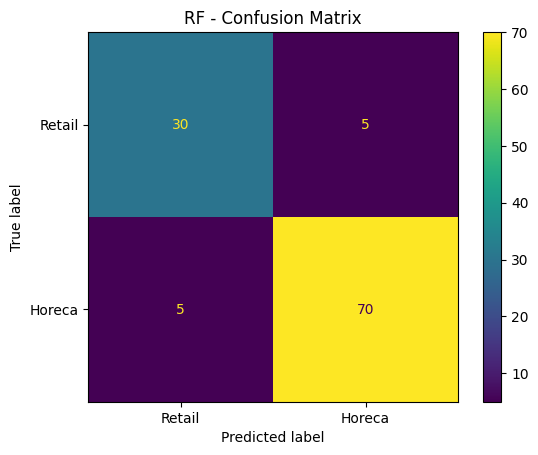


XGBoost scores:
               precision    recall  f1-score   support

      Retail       0.85      0.83      0.84        35
      Horeca       0.92      0.93      0.93        75

    accuracy                           0.90       110
   macro avg       0.89      0.88      0.88       110
weighted avg       0.90      0.90      0.90       110



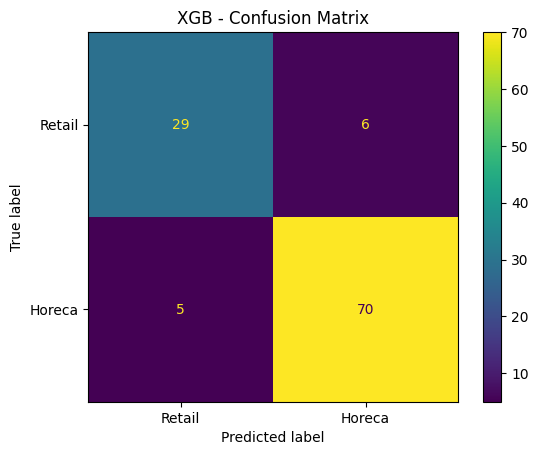

In [57]:
try:
  import xgboost
except:
  !pip install xgboost
  import xgboost

import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/cassiusf/datasets/main/customers_data.csv')

# Checking if is missing data, if True, the sample(row) is removed
missing_data = df.isnull().values.any()
df.dropna(inplace=True) if missing_data else None
print('Missing data:', missing_data)

# Separating features and target
x = df.drop(columns=['Channel'])
y = df['Channel']

# Transfoming the class 2 ('Retail') to 0. The class 1 ('Horeca') remains the same
target_map = {2: 0}
y = y.replace(target_map)
labels = ['Retail', 'Horeca']

# Separating data between train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42, train_size=0.75)

# Applying Random Forest with default settings
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

# Recall, Precision, Accuracy, F1-score of Random Forest
print('\nRandom Forest scores:\n', classification_report(y_test, rf_pred, target_names=labels))

# Confusion Matrix of Random Forest
cm = confusion_matrix(y_test, rf_pred)
display = ConfusionMatrixDisplay(cm, display_labels=labels)
display.plot()
plt.title('RF - Confusion Matrix')
plt.show()

# Applying XGBoost with default settings
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

# Recall, Precision, Accuracy, F1-score of XGBoost
print('\nXGBoost scores:\n', classification_report(y_test, xgb_pred, target_names=labels))

# Confusion Matrix of XGBoost
cm = confusion_matrix(y_test, xgb_pred)
display = ConfusionMatrixDisplay(cm, display_labels=labels)
display.plot()
plt.title('XGB - Confusion Matrix')
plt.show()